In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [31]:
### read csv file
freedom_csv = "data/indexfreedom.csv"

In [32]:
freedom_df = pd.read_csv(freedom_csv, encoding="utf-8")
freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


In [33]:
# drop rows for 2008-2015 
other_years = freedom_df[ (freedom_df['year'] < 2016) ].index

# Delete these row indexes from dataFrame
only_2016_df= freedom_df.drop(other_years, inplace=True)

freedom_df

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2016,VEN,Venezuela,Latin America & the Caribbean,1.479799,3.271891,1.429083,2.060257,0.000000,10.0,...,1.522774,4.996742,1.122213,2.009841,2.483540,2.88,162.0,4.200724,161.0,4.0
158,2016,VNM,Vietnam,South Asia,5.376034,4.448922,4.911257,4.912071,9.392643,5.0,...,3.661293,8.210613,4.417755,5.896365,6.701358,6.42,112.0,6.194004,124.0,4.0
159,2016,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,2.623957,7.336599,0.0,...,2.112554,NaN,7.220087,4.159381,5.227397,6.34,117.0,4.253278,160.0,4.0
160,2016,ZMB,Zambia,Sub-Saharan Africa,3.300633,4.891213,4.154905,4.115584,7.880823,10.0,...,3.141872,7.831044,8.161670,6.174719,6.412301,6.61,97.0,6.308849,116.0,3.0


In [34]:
corrupt_df = freedom_df[['countries','pf_score','ef_regulation_business_bribes']]
corrupt_df

,countries,pf_score,ef_regulation_business_bribes
0,Albania,7.596281,4.050196
1,Algeria,5.281772,3.765515
2,Angola,6.111324,1.945540
3,Argentina,8.099696,3.260044
4,Armenia,6.912804,4.575152
...,...,...,...
157,Venezuela,5.521449,1.522774
158,Vietnam,5.968008,3.661293
159,"Yemen, Rep.",2.166555,2.112554
160,Zambia,6.007699,3.141872


In [35]:
corruption = corrupt_df["ef_regulation_business_bribes"].values
pf_score = corrupt_df["pf_score"].values
countries = corrupt_df["countries"].values

r^2: 0.17791201083897806
p-value: 6.231692519607064e-08


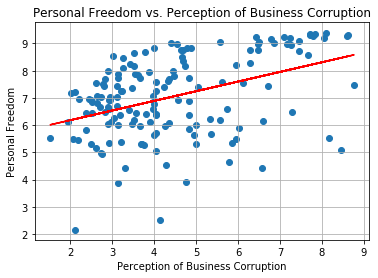

In [62]:

fig, ax = plt.subplots()

ax.scatter(corruption, pf_score)

plt.title("Personal Freedom vs. Perception of Business Corruption")
plt.xlabel("Perception of Business Corruption")
plt.ylabel("Personal Freedom")
mask = ~np.isnan(corruption) & ~np.isnan(pf_score)
slope, intercept, r_value, p_value, std_err = stats.linregress(corruption[mask], pf_score[mask])
regression_line = slope * corruption + intercept
plt.plot(corruption, regression_line, 'r')
plt.grid()
print(f"r^2: {r_value*r_value}")
print(f"p-value: {p_value}")